In [2]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [4]:
#import data
df = pd.read_csv("augmented_data.csv")
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14866 entries, 0 to 14865
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14866 non-null  int64  
 1   index       14866 non-null  int64  
 2   image_path  14866 non-null  object 
 3   steering    14866 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 464.7+ KB


In [51]:
length = df["index"][-1::]
split = int(length/100*80) #80% for training 20% for testing
print(split)


11892


In [52]:
#shuffling the set before we split it
df_shuffled = df.sample(frac=1)

In [54]:
#print header to see if it shuffled
df_shuffled.head()

,Unnamed: 0,index,image_path,steering
6638,6638,6638,learning_images//6638.jpeg,-0.042254
10893,10893,10893,learning_images//10893.jpeg,-0.145540
1614,1614,1614,learning_images//1614.jpeg,-0.028169
14005,14005,14005,learning_images//14005.jpeg,-0.206573
3502,3502,3502,learning_images//3502.jpeg,0.000000


In [44]:
#split in training and testing data
#x holds the image
#y holds the steering input
train = df_shuffled.iloc[:split,:]
test = df_shuffled.iloc[split:,:]

#training data
x_train = train["image_path"]
y_train = train["steering"]

#testing data
x_test = test["image_path"]
y_test = test["steering"]

#reset rows
x_test = x_test.reset_index()
y_test = y_test.reset_index()

In [45]:
#checking outputs
x_train.iloc[0]

'learning_images//0.jpeg'

TypeError: Image data of dtype object cannot be converted to float

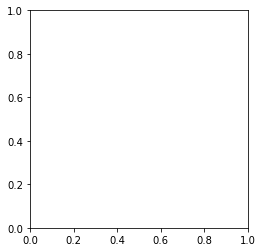

In [48]:
import cv2

#show an example image
image = cv2.imread(x_train.iloc[0])
plt.imshow(image)
plt.title(y_train.iloc[0])
plt.show()

